1. 데이터 셋 합치기(전처리)
pandas 라이브러리를 통해 데이터 csv파일을 로드한다
2. data_m2라고 나와있는 데이터는 미국 연방준비은행인 Fed에서 가져왔다 출처 : https://fred.stlouisfed.org/series/M2SL

In [2]:
import pandas as pd # 판다스 로드
# 데이터프레임 로드
data_rate = pd.read_csv('./금리.csv')
data_stack = pd.read_csv('./S&P500 Rate.csv')
data_m2 = pd.read_csv('./M2.csv')

#출력
data_rate
data_stack
data_m2

,DATE,M2SL,M2per
0,1959-01-01,286.6,0.30
1,1959-02-01,287.7,0.38
2,1959-03-01,289.2,0.52
3,1959-04-01,290.1,0.31
4,1959-05-01,292.2,0.72
...,...,...,...
760,2022-05-01,21649.2,0.02
761,2022-06-01,21607.7,-0.19
762,2022-07-01,21636.2,0.13
763,2022-08-01,21632.4,-0.02


data_stack, data_rate, data_m2 비교결과 1959년 1월부터 분석하는게 데이터값의 Null을 최대한 줄일 수 있을거라 판단
이전의 데이터는 모두 삭제한다


In [3]:
#54년 7월 이전데이터 제거
for i in range(0, 7754):
    data_stack = data_stack.drop([i], axis=0)
data_stack.reset_index(inplace=True)
data_stack

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,7754,1959-01-02,55.439999,55.439999,55.439999,55.439999,55.439999,3380000
1,7755,1959-01-05,55.660000,55.660000,55.660000,55.660000,55.660000,4210000
2,7756,1959-01-06,55.590000,55.590000,55.590000,55.590000,55.590000,3690000
3,7757,1959-01-07,54.889999,54.889999,54.889999,54.889999,54.889999,4140000
4,7758,1959-01-08,55.400002,55.400002,55.400002,55.400002,55.400002,4030000
...,...,...,...,...,...,...,...,...
15564,23318,2020-10-29,3277.169922,3341.050049,3259.820068,3310.110107,3310.110107,4903070000
15565,23319,2020-10-30,3293.590088,3304.929932,3233.939941,3269.959961,3269.959961,4840450000
15566,23320,2020-11-02,3296.199951,3330.139893,3279.739990,3310.239990,3310.239990,4310590000
15567,23321,2020-11-03,3336.250000,3389.489990,3336.250000,3369.159912,3369.159912,4220070000


금리데이터나 인플레이션 등 값이 비어있는 경우는 발표를 안하는 달로 이때는 이전값을 승계하도록 전처리를 진행한다.

In [4]:
data_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Year                          894 non-null    int64  
 1   Month                         894 non-null    int64  
 2   Day                           894 non-null    int64  
 3   Federal Funds Target Rate     462 non-null    float64
 4   Federal Funds Upper Target    103 non-null    float64
 5   Federal Funds Lower Target    103 non-null    float64
 6   Effective Federal Funds Rate  742 non-null    float64
 7   Real GDP (Percent Change)     247 non-null    float64
 8   Unemployment Rate             742 non-null    float64
 9   Inflation Rate                742 non-null    float64
dtypes: float64(7), int64(3)
memory usage: 70.0 KB


In [5]:
#금리데이터 확인,금리는 동결할때가 Null로 표시되어 있다.

#NaN값 체크변수
ch = data_rate['Real GDP (Percent Change)'].isnull()
ch_rate = data_rate['Effective Federal Funds Rate'].isnull()
ch_rate1 = data_rate['Unemployment Rate'].isnull()
ch_rate2 = data_rate['Inflation Rate'].isnull()
for i in range(0, len(data_rate)):
        if ch[i] == True:
            data_rate['Real GDP (Percent Change)'][i] = data_rate['Real GDP (Percent Change)'][i-1]
        if ch_rate[i] == True:
            data_rate['Effective Federal Funds Rate'][i] = data_rate['Effective Federal Funds Rate'][i-1]
        if ch_rate1[i] == True:
            data_rate['Unemployment Rate'][i] = data_rate['Unemployment Rate'][i-1]
        if ch_rate2[i] == True:
            data_rate['Inflation Rate'][i] = data_rate['Inflation Rate'][i-1]
data_rate
data_rate.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Year                          894 non-null    int64  
 1   Month                         894 non-null    int64  
 2   Day                           894 non-null    int64  
 3   Federal Funds Target Rate     462 non-null    float64
 4   Federal Funds Upper Target    103 non-null    float64
 5   Federal Funds Lower Target    103 non-null    float64
 6   Effective Federal Funds Rate  894 non-null    float64
 7   Real GDP (Percent Change)     894 non-null    float64
 8   Unemployment Rate             894 non-null    float64
 9   Inflation Rate                894 non-null    float64
dtypes: float64(7), int64(3)
memory usage: 70.0 KB


/var/folders/nr/9xk7tb5j417dbtbp5tmcrzhm0000gn/T/ipykernel_3170/1194393439.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_rate['Real GDP (Percent Change)'][i] = data_rate['Real GDP (Percent Change)'][i-1]
/var/folders/nr/9xk7tb5j417dbtbp5tmcrzhm0000gn/T/ipykernel_3170/1194393439.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_rate['Effective Federal Funds Rate'][i] = data_rate['Effective Federal Funds Rate'][i-1]
/var/folders/nr/9xk7tb5j417dbtbp5tmcrzhm0000gn/T/ipykernel_3170/1194393439.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveat

데이터를 하나의 데이터프레임에 합치기 위해 열을 추가로 생성해주고 합쳐주는 코드이다


In [6]:
#열추가
data_stack['Gdp'] = 0
data_stack['Funds Rate'] = 0
data_stack['Inflation Rate'] = 0
data_stack['Unemployment Rate'] = 0
data_stack['M2'] = 0
#최근주가 업데이트
data_stack['rscost'] = 0

In [7]:
#값입력
import re
c = 0
for j in range(0, len(data_rate)):
    #rate 년도추출
    r_year_search = data_rate['Year'][j]
    r_month_search = data_rate['Month'][j]
    for i in range(0, len(data_stack)):
        try:
            #스탁 년도추출
            s_year_search = data_stack['Date'][c][0]+data_stack['Date'][c][1]+data_stack['Date'][c][2]+data_stack['Date'][c][3]
            s_month_search = data_stack['Date'][c][5]+data_stack['Date'][c][6]
            #배치
            if str(s_year_search) == str(r_year_search):
                if str(re.sub('0(.+?)', s_month_search.replace('0', ''), s_month_search)) == str(r_month_search):
                    data_stack['Gdp'][c] = data_rate['Real GDP (Percent Change)'][j]
                    data_stack['Funds Rate'][c] = data_rate['Effective Federal Funds Rate'][j]
                    data_stack['Unemployment Rate'][c] = data_rate['Unemployment Rate'][j]
                    data_stack['Inflation Rate'][c] = data_rate['Inflation Rate'][j]
                    #최근주가 업데이트
                    try:
                        data_stack['rscost'][c] = data_stack['Adj Close'][c-1]
                    except:
                        data_stack['rscost'][c] = 55
                    c += 1
                else:
                    break
            else:
                break
        except:
            pass
df = data_stack
df#값

/var/folders/nr/9xk7tb5j417dbtbp5tmcrzhm0000gn/T/ipykernel_3170/4230511774.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_stack['Gdp'][c] = data_rate['Real GDP (Percent Change)'][j]
/var/folders/nr/9xk7tb5j417dbtbp5tmcrzhm0000gn/T/ipykernel_3170/4230511774.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_stack['Funds Rate'][c] = data_rate['Effective Federal Funds Rate'][j]
/var/folders/nr/9xk7tb5j417dbtbp5tmcrzhm0000gn/T/ipykernel_3170/4230511774.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pyd

,index,Date,Open,High,Low,Close,Adj Close,Volume,Gdp,Funds Rate,Inflation Rate,Unemployment Rate,M2,rscost
0,7754,1959-01-02,55.439999,55.439999,55.439999,55.439999,55.439999,3380000,7.7,2.48,1.7,6.0,0,55.000000
1,7755,1959-01-05,55.660000,55.660000,55.660000,55.660000,55.660000,4210000,7.7,2.48,1.7,6.0,0,55.439999
2,7756,1959-01-06,55.590000,55.590000,55.590000,55.590000,55.590000,3690000,7.7,2.48,1.7,6.0,0,55.660000
3,7757,1959-01-07,54.889999,54.889999,54.889999,54.889999,54.889999,4140000,7.7,2.48,1.7,6.0,0,55.590000
4,7758,1959-01-08,55.400002,55.400002,55.400002,55.400002,55.400002,4030000,7.7,2.48,1.7,6.0,0,54.889999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15564,23318,2020-10-29,3277.169922,3341.050049,3259.820068,3310.110107,3310.110107,4903070000,3.9,0.25,1.2,6.9,0,3271.030029
15565,23319,2020-10-30,3293.590088,3304.929932,3233.939941,3269.959961,3269.959961,4840450000,3.9,0.25,1.2,6.9,0,3310.110107
15566,23320,2020-11-02,3296.199951,3330.139893,3279.739990,3310.239990,3310.239990,4310590000,3.9,0.25,1.2,6.9,0,3269.959961
15567,23321,2020-11-03,3336.250000,3389.489990,3336.250000,3369.159912,3369.159912,4220070000,3.9,0.25,1.2,6.9,0,3310.239990


In [8]:
#값입력
c = 0
for j in range(0, len(data_m2)):
    #data_m2 년도 추출
    r_year_search = data_m2['DATE'][j][0]+data_m2['DATE'][j][1]+data_m2['DATE'][j][2]+data_m2['DATE'][j][3]
    r_month_search = data_m2['DATE'][j][5]+data_m2['DATE'][j][6]
    for i in range(0, len(data_stack)-2):
        try:
            #스탁 년도추출
            s_year_search = data_stack['Date'][c][0]+data_stack['Date'][c][1]+data_stack['Date'][c][2]+data_stack['Date'][c][3]
            s_month_search = data_stack['Date'][c][5]+data_stack['Date'][c][6]
            #배치
            if str(s_year_search) == str(r_year_search):
                if str(s_month_search) == str(r_month_search):
                    data_stack['M2'][c] = data_m2['M2per'][j]
                    # print(f'{s_month_search} 에 ', data_rate['Real GDP (Percent Change)'][j])
                    c += 1
                else:
                    break
            else:
                break
        except:
            pass
# df = data_stack.drop(['index', 'Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df#값

/var/folders/nr/9xk7tb5j417dbtbp5tmcrzhm0000gn/T/ipykernel_3170/2611490814.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_stack['M2'][c] = data_m2['M2per'][j]


,index,Date,Open,High,Low,Close,Adj Close,Volume,Gdp,Funds Rate,Inflation Rate,Unemployment Rate,M2,rscost
0,7754,1959-01-02,55.439999,55.439999,55.439999,55.439999,55.439999,3380000,7.7,2.48,1.7,6.0,0.30,55.000000
1,7755,1959-01-05,55.660000,55.660000,55.660000,55.660000,55.660000,4210000,7.7,2.48,1.7,6.0,0.30,55.439999
2,7756,1959-01-06,55.590000,55.590000,55.590000,55.590000,55.590000,3690000,7.7,2.48,1.7,6.0,0.30,55.660000
3,7757,1959-01-07,54.889999,54.889999,54.889999,54.889999,54.889999,4140000,7.7,2.48,1.7,6.0,0.30,55.590000
4,7758,1959-01-08,55.400002,55.400002,55.400002,55.400002,55.400002,4030000,7.7,2.48,1.7,6.0,0.30,54.889999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15564,23318,2020-10-29,3277.169922,3341.050049,3259.820068,3310.110107,3310.110107,4903070000,3.9,0.25,1.2,6.9,0.86,3271.030029
15565,23319,2020-10-30,3293.590088,3304.929932,3233.939941,3269.959961,3269.959961,4840450000,3.9,0.25,1.2,6.9,0.86,3310.110107
15566,23320,2020-11-02,3296.199951,3330.139893,3279.739990,3310.239990,3310.239990,4310590000,3.9,0.25,1.2,6.9,1.23,3269.959961
15567,23321,2020-11-03,3336.250000,3389.489990,3336.250000,3369.159912,3369.159912,4220070000,3.9,0.25,1.2,6.9,1.23,3310.239990


하나로 합친 데이터파일을 시각화 하면 다음과 같다

<AxesSubplot:xlabel='Date'>

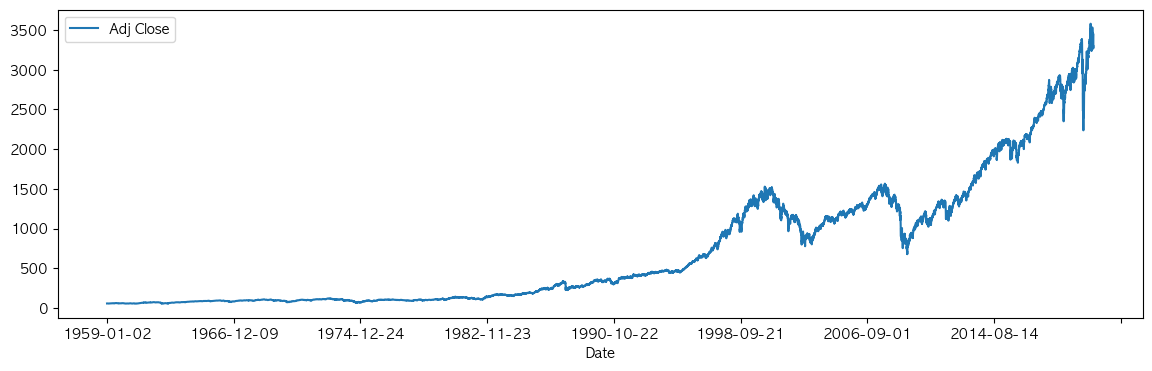

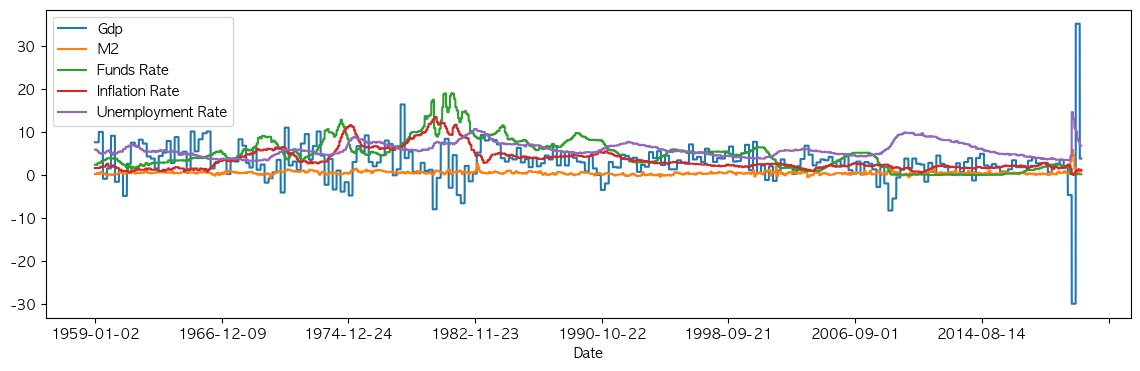

In [9]:
import matplotlib.pyplot as plt # 데이터 시각화 모듈
#폰트 깨짐
plt.rcParams['font.family'] = 'AppleGothic'
#크기 조절
plt.rcParams['axes.unicode_minus'] = False

plt.rcParams["figure.figsize"] = (14,4)
df.index = df['Date']
df[['Adj Close']].plot()
df[['Gdp', 'M2','Funds Rate', 'Inflation Rate', 'Unemployment Rate']].plot()


상관관계 분석결과 M2값이 의미있을거라 생각했지만 의미가 없었다. 보통 최소 0.1~0.2는 넘어야 상관관계가 있다고 보기에 실업률, 인플레, 금리만 사용한다

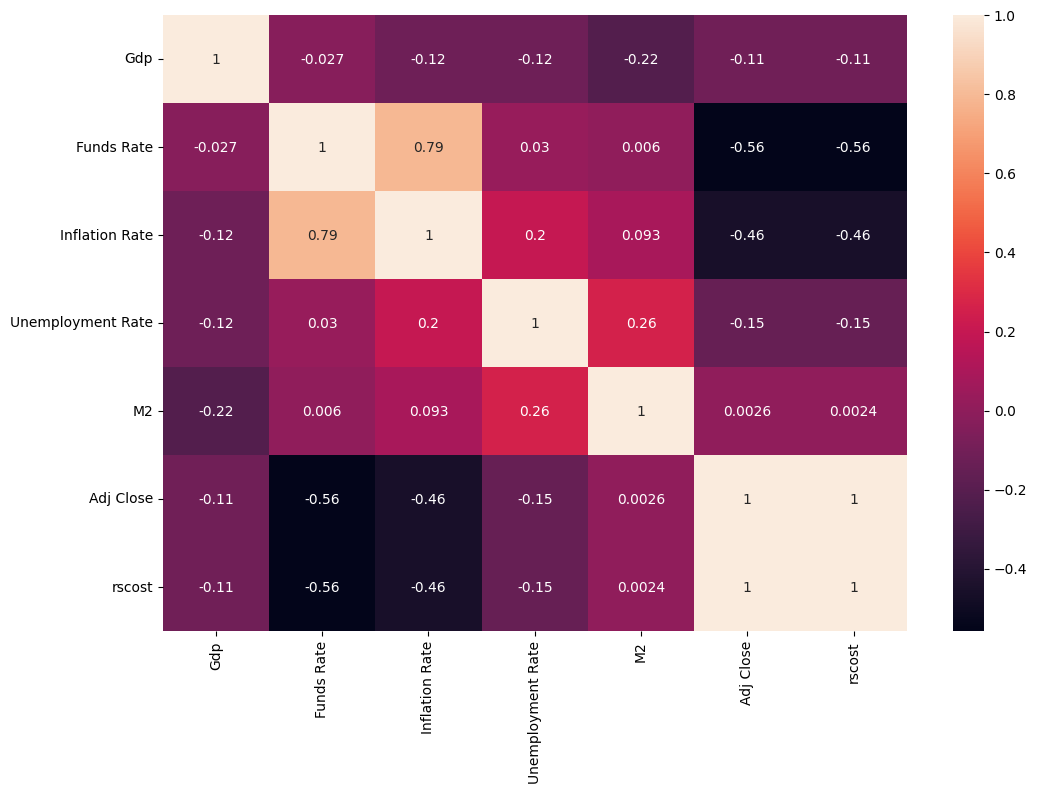

In [10]:
import seaborn as sns # 데이터 시각화 모듈
import matplotlib.pyplot as plt # 데이터 시각화 모듈
#상관관계
plt.figure(figsize=(12,8))
sns.heatmap(df[['Gdp', 'Funds Rate', 'Inflation Rate',
                'Unemployment Rate', 'M2', 'Adj Close', 'rscost']].corr(),annot=True)
plt.show()

데이터 스케일링은 데이터값의 범위를 조절하는것이고 데이터 값이 너무 크거나 작으면 0 혹은 무한으로 발산해버릴 수 있기 때문에 진행한다.
대표적으로 정규화와 표준화가 존재하고 이번 알고리즘에선 정규화를 사용하며 이번 데이터셋에는 코로나 시기의 이상치값이 매우 크게 존재하기에
이상치 영향을 최소화 할 수 있는 RobustScaler 알고리즘을 이용한다

In [11]:
#정규화
from sklearn.preprocessing import RobustScaler, MinMaxScaler

scaler = MinMaxScaler()

scale_cols = ['Funds Rate', 'Inflation Rate','rscost']
# scale_cols = ['Funds Rate', 'Inflation Rate', 'Unemployment Rate', 'Gdp']
scaled_df = scaler.fit_transform(df[scale_cols])
scaled_df = pd.DataFrame(scaled_df, columns=scale_cols)
print(scaled_df)

scaler1 = MinMaxScaler()

scale_cols1 = ['Adj Close']
scaled1_df = scaler1.fit_transform(df[scale_cols1])
scaled1_df = pd.DataFrame(scaled1_df, columns=scale_cols1)
print(scaled1_df)


       Funds Rate  Inflation Rate    rscost
0        0.126642        0.118519  0.000794
1        0.126642        0.118519  0.000918
2        0.126642        0.118519  0.000981
3        0.126642        0.118519  0.000961
4        0.126642        0.118519  0.000762
...           ...             ...       ...
15564    0.009459        0.081481  0.912201
15565    0.009459        0.081481  0.923276
15566    0.009459        0.081481  0.911898
15567    0.009459        0.081481  0.923313
15568    0.009459        0.081481  0.940011

[15569 rows x 3 columns]
       Adj Close
0       0.000918
1       0.000981
2       0.000961
3       0.000762
4       0.000907
...          ...
15564   0.923276
15565   0.911898
15566   0.923313
15567   0.940011
15568   0.961061

[15569 rows x 1 columns]


In [13]:
feature_cols = ['Funds Rate', 'Inflation Rate',
                'rscost']
label_cols = ['Adj Close']

feature_df = pd.DataFrame(scaled_df, columns=feature_cols)
label_df = pd.DataFrame(scaled1_df, columns=label_cols)

feature_np = feature_df.to_numpy()
label_np = label_df.to_numpy()

In [14]:
import numpy as np
window_size = 60
def make_sequene_dataset(feature, label, window_size):

    feature_list = []
    label_list = []

    for i in range(len(feature)-window_size):

        feature_list.append(feature[i:i+window_size])
        label_list.append(label[i+window_size])

    return np.array(feature_list), np.array(label_list)

X, Y = make_sequene_dataset(feature_np, label_np, window_size)

print(X.shape, Y.shape)

(15509, 60, 3) (15509, 1)


In [15]:
split = 11594

x_train = X[0:split]
y_train = Y[0:split]

x_test = X[split:]
y_test = Y[split:]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(11594, 60, 3) (11594, 1)
(3915, 60, 3) (3915, 1)


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
model = Sequential()

model.add(LSTM(128, input_shape=x_train[0].shape, return_sequences = True))
model.add(LSTM(64))
model.add(Dense(1, activation='tanh'))
model.compile(loss='mse', optimizer='adam', metrics='mae')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 128)           67584     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 117,057
Trainable params: 117,057
Non-trainable params: 0
_________________________________________________________________


In [17]:
hit = model.fit(x_train, y_train,
          validation_data=(x_test, y_test),
          epochs=15, batch_size=16)

2022-12-20 14:53:26.774631: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/15
725/725 [==============================] - 28s 37ms/step - loss: 1.4348e-04 - mae: 0.0046 - val_loss: 0.0028 - val_mae: 0.0337
Epoch 2/15
725/725 [==============================] - 26s 36ms/step - loss: 2.7945e-05 - mae: 0.0035 - val_loss: 0.0037 - val_mae: 0.0409
Epoch 3/15
725/725 [==============================] - 26s 35ms/step - loss: 2.7190e-05 - mae: 0.0035 - val_loss: 0.0027 - val_mae: 0.0326
Epoch 4/15
725/725 [==============================] - 25s 35ms/step - loss: 1.9222e-05 - mae: 0.0029 - val_loss: 0.0036 - val_mae: 0.0406
Epoch 5/15
725/725 [==============================] - 26s 36ms/step - loss: 2.6722e-05 - mae: 0.0036 - val_loss: 0.0027 - val_mae: 0.0324
Epoch 6/15
725/725 [==============================] - 26s 36ms/step - loss: 1.9324e-05 - mae: 0.0030 - val_loss: 0.0034 - val_mae: 0.0404
Epoch 7/15
725/725 [==============================] - 26s 36ms/step - loss: 1.9634e-05 - mae: 0.0030 - val_loss: 0.0023 - val_mae: 0.0289
Epoch 8/15
725/725 [==============

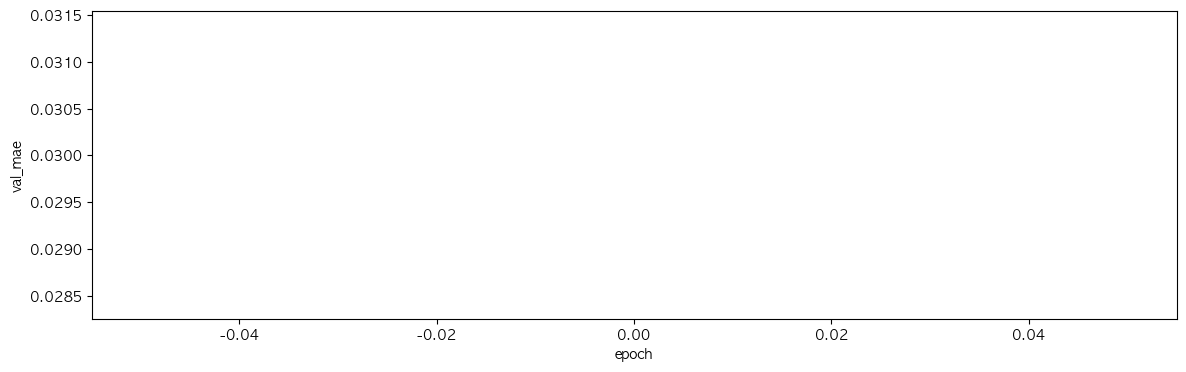

In [26]:
fig, loss_ax = plt.subplots()

loss_ax.plot(hit.history['val_mae'], 'r', label='mae')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('val_mae')

plt.show()

/opt/homebrew/Caskroom/miniforge/base/envs/Ai/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/Ai/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/Ai/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/Ai/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/Ai/lib/python3.9/site-packages/IPython/core/pylabtools.p

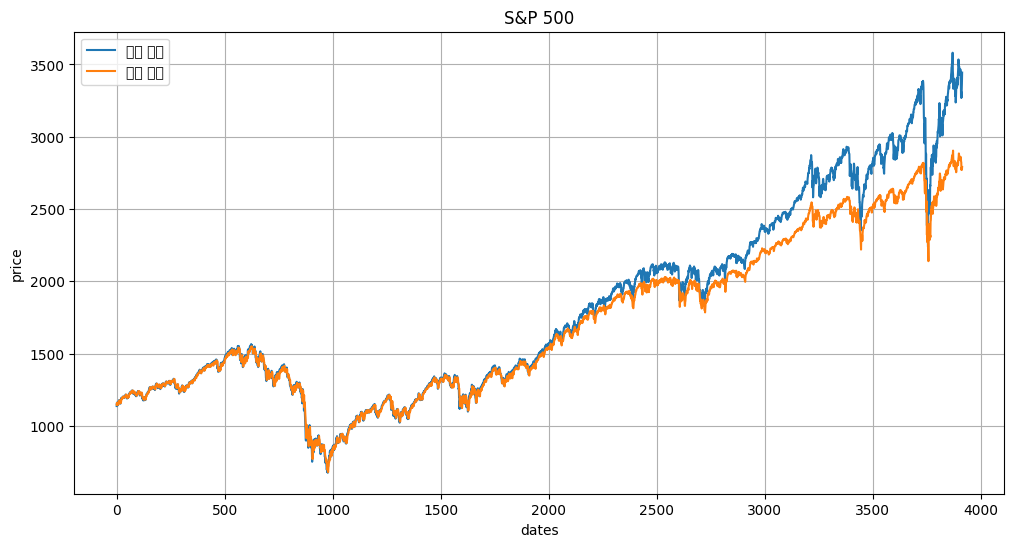

In [18]:
#정규화 역변환 함수
y_test = scaler1.inverse_transform(y_test)
#모델 출력
pred = model.predict(x_test)
#모델 정규화 역변환
pred = scaler1.inverse_transform(pred)

plt.figure(figsize=(12, 6))
plt.title('S&P 500')
plt.ylabel('price')
plt.xlabel('dates')
plt.plot(y_test, label='실제 주가')
plt.plot(pred, label='예측 주가')
plt.grid()
plt.legend(loc='best')

plt.show()